# Some attempt at Particle Tracking

In [355]:
# Importing things

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.fft import rfft, rfftfreq
from scipy.fft import fft, fftfreq

from lab_functions import *

In [356]:
# where is the data?
loc = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/2024-03-11/'
loc2 = 'C:/Users/abiga/OneDrive - Durham University/1. Fourth Year/1. Project/Memory Stick Backup/2024-03-11/CROPPED/'
filename = 'Results.csv'
filename2 = 'trajectory.csv'

# read in as dataframe
df = pd.read_csv(loc + filename)
df2 = pd.read_csv(loc2 + filename2)

# select x and y positions of bead for all 83 frames
# get rid of anomalous last point
x = np.array(df['x'])[:-1]
y = np.array(df['y'])[:-1]

# Do the same for the free particle
x_free = np.array(df2['x'])[:-4]
y_free = np.array(df2['y'])[:-4]

In [357]:
# Conversion Factor
pixels_microns = 15.36
pm_err = 0.5

x_mic = x*(1/pixels_microns)
y_mic = y*(1/pixels_microns)

# The same for the free particle
x_mic_f = x_free*(1/pixels_microns)
y_mic_f = y_free*(1/pixels_microns)

x_mic_err = np.abs(x*(1/(pixels_microns+pm_err)) - x*(1/pixels_microns))
y_mic_err = np.abs(y*(1/(pixels_microns+pm_err)) - y*(1/pixels_microns))
x_mic_ferr = np.abs(x_free*(1/(pixels_microns+pm_err)) - x_free*(1/pixels_microns))
y_mic_ferr = np.abs(y_free*(1/(pixels_microns+pm_err)) - y_free*(1/pixels_microns))

In [388]:
x_trans = x_mic - x_mic[0] + 15
xf_trans = x_mic_f - x_mic_f[0]
y_trans = -y_mic + y_mic[0] + 1
yf_trans = -y_mic_f + y_mic_f[0]

print(xf_trans, yf_trans)

[ 0.          0.12942708  0.2735026   0.43808594  0.78190104  0.68033854
  0.66471354  1.20130208  1.30859375  0.71835938  0.93925781  0.55670573
  1.02298177  1.17890625  0.76067708  0.91295573  0.92923177  0.95013021
  0.66666667  0.93509115  1.74199219  1.77578125  1.89173177  2.4390625
  2.93606771  3.23684896  3.71731771  3.99602865  4.25852865  4.89179688
  5.27454427  5.21367188  5.49765625  5.83450521  6.48177083  6.3469401
  6.28385417  5.97161458  6.66503906  6.12408854  6.18164062  6.21510417
  6.06901042  5.48535156  4.96705729  4.9561849   5.02734375  4.90963542
  4.81640625  5.26829427  5.5110026   5.68157552  6.14049479  6.6453125
  6.79505208  7.43463542  7.67005208  8.39114583  9.20286458  9.66341146
 10.42714844 10.56152344 11.16425781 11.46373698 11.71699219 12.04140625
 12.60911458 12.96751302 13.27773438 13.55026042 13.81848958 14.0969401
 14.92408854 14.9171224  14.84889323 15.18821615 15.79316406 15.925
 16.3688151  16.90182292 18.190625   19.15833333 20.0265625 

In [359]:
fps = 30
fps_err = 1

time = np.arange(x_free.size)*(1/fps)
time_err = np.abs(np.arange(x_free.size)*(1/(fps+fps_err)) - time)

C:\Users\abiga\AppData\Local\Temp\ipykernel_24540\642232062.py:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.set_ticklabels(ticklabels = np.arange(0,2.6,0.5), **fontdict1)


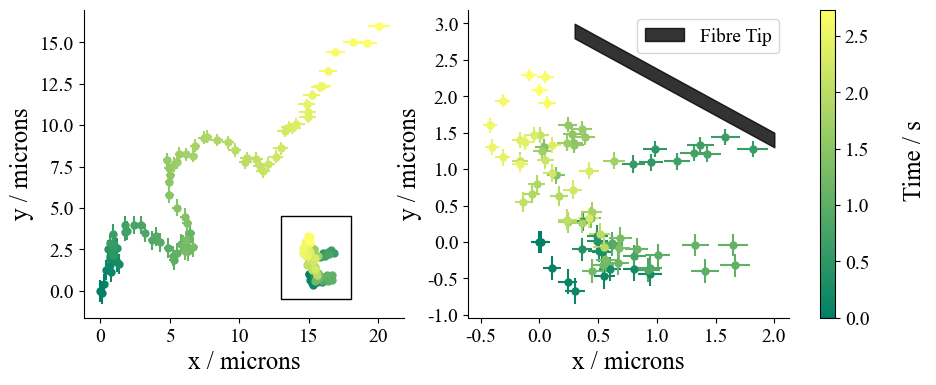

In [389]:
# Plot x and y trajectory

fig, axs = plt.subplots(1,2, figsize = (10,4))
# Name axes large and zoom
l, z = axs
# Get rid of some spines
l.spines['top'].set_visible(False)
l.spines['right'].set_visible(False)
z.spines['top'].set_visible(False)
z.spines['right'].set_visible(False)

font2 = mpl.font_manager.FontProperties(family='Times New Roman',
style='normal', size=14)

# Colour map
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Set up color gradient normalization
norm = Normalize(vmin=time.min(), vmax=time.max())

# Create a ScalarMappable object
sm = ScalarMappable(norm=norm, cmap='summer')
sm.set_array([])  # You need to set an array to make the ScalarMappable work

# Large Axis - Plotting
for i in range(x_trans.size):
    l.errorbar(x_trans[i],y_trans[i], xerr = x_mic_err[i], yerr = y_mic_err[i], fmt = 'o', ms = 5, linestyle = '-', color=sm.to_rgba((time[i])))
    l.errorbar(xf_trans[i],yf_trans[i], yerr = y_mic_ferr[i], xerr = x_mic_ferr[i], ms = 5, fmt = 'o', linestyle = '-', color=sm.to_rgba(time[i]))

l.set_xlabel('x / microns', font = 'Times New Roman', fontsize = 18)
l.set_ylabel('y / microns', font = 'Times New Roman', fontsize = 18)

# Make box
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
rect = [Rectangle((13,-0.5),5,5)]
pc = PatchCollection(rect, facecolor = 'white', edgecolor = 'k')
l.add_collection(pc)

# Add colorbar
cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.05, pad=0.04)
cbar.set_label('\n Time / s', font = 'Times New Roman', fontsize = 18)

# Zoomed axis

for i in range(x_trans.size):
    z.errorbar(x_mic[i] - x_mic[0], -y_mic[i] + y_mic[0], xerr = x_mic_err[i], yerr = y_mic_err[i], fmt = 'o', ms = 5, linestyle = '-', color=sm.to_rgba(time[i]))

# Where does the fibre sit?
# Approx
fibre = 20 / pixels_microns

grad = (1.5 - 2) / (2-(0.3+fibre))*0.7
c1 = 1.3 - (grad*2)
c2 = 1.5 - (grad*2)
SN = np.linspace(0.3,2,100)
z.fill_between(SN,grad*SN+c1,grad*SN+c2, color = 'black', alpha = 0.8, label = 'Fibre Tip')

z.set_xlabel('x / microns', font = 'Times New Roman', fontsize = 18)
z.set_ylabel('y / microns', font = 'Times New Roman', fontsize = 18)
z.legend(prop = font2)

# Fonts

fontdict1 = {'fontsize': 30,
 'font': 'Times New Roman'}

cbar.set_ticklabels(ticklabels = np.arange(0,2.6,0.5), **fontdict1)
cbar.ax.tick_params(labelsize=14)

l.set_xticks(ticks = np.arange(0,21,5), labels = np.arange(0,21,5), font = 'Times New Roman')
l.tick_params(axis='x', labelsize=14)
l.set_yticks(ticks = np.arange(0,16,2.5), labels = np.arange(0,16,2.5), font = 'Times New Roman')
l.tick_params(axis='y', labelsize=14)

z.set_xticks(ticks = np.arange(-0.5,2.1,0.5), labels = np.arange(-0.5,2.1,0.5), font = 'Times New Roman')
z.tick_params(axis='x', labelsize=14)
z.set_yticks(ticks = np.arange(-1,3.1,0.5), labels = np.arange(-1,3.1,0.5), font = 'Times New Roman')
z.tick_params(axis='y', labelsize=14)


Text(0, 0.5, 'Position / Microns')

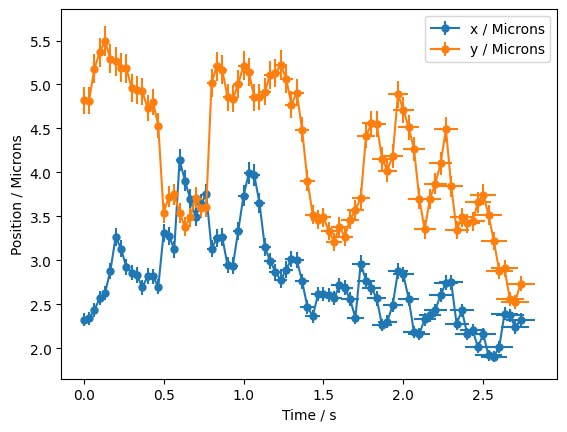

In [361]:
# plot x and y over time
plt.errorbar(time,x_mic, xerr = time_err, yerr = x_mic_err, ms = 5, fmt = 'o', linestyle = '-', label = 'x / Microns')
plt.errorbar(time,y_mic, xerr = time_err, yerr = y_mic_err, ms = 5, fmt = 'o', linestyle = '-', label = 'y / Microns')
plt.legend()
plt.xlabel('Time / s')
plt.ylabel('Position / Microns')

Text(0.5, 1.0, 'Particle Position with Time')

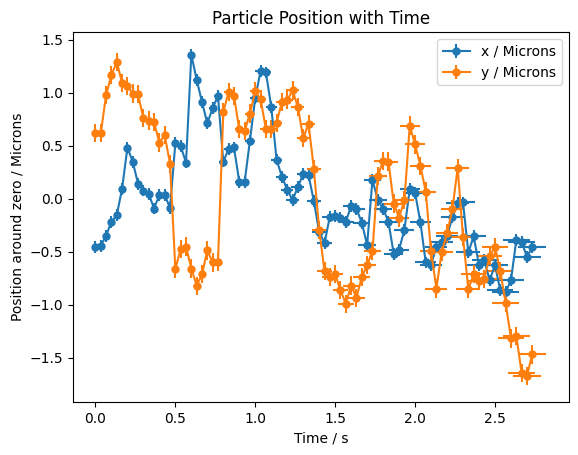

In [362]:
# Find mean of particle tracks to centre data on zero
x_mean = np.mean(x_mic)
y_mean = np.mean(y_mic)

# Error on mean = standard error
x_stderr = np.std(x_mic) / np.sqrt(len(x_mic))
y_stderr = np.std(y_mic) / np.sqrt(len(y_mic))

# Subtract mean from data
x_mic0 = x_mic - x_mean
y_mic0 = y_mic - y_mean

# Errors
x_mic0_err = np.abs( (x_mic - (x_mean+x_stderr)) - (x_mic - x_mean) )
y_mic0_err = np.abs( (y_mic - (y_mean+y_stderr)) - (y_mic - y_mean) )

# plot x and y over time
plt.errorbar(time,x_mic0, xerr = time_err, yerr = x_mic0_err, ms = 5, fmt = 'o', linestyle = '-', label = 'x / Microns')
plt.errorbar(time,y_mic0, xerr = time_err, yerr = y_mic0_err, ms = 5, fmt = 'o', linestyle = '-', label = 'y / Microns')
plt.legend()
plt.xlabel('Time / s')
plt.ylabel('Position around zero / Microns')
plt.title('Particle Position with Time')

In [363]:
def fourier_calc(data, sample_number):

    # Compute transform and normalise by length / 2
    fast_four = rfft(data, n = sample_number) / (len(data) / 2)

    # Compute amplitude squared and divide by measurement time
    ps = np.abs(fast_four)**2 / time[-1]

    # Calculate frequency components (is the sample spacing right?)
    freq = rfftfreq(sample_number, d=1.0/fps)

    return ps, freq

Consider Error on Particle Tracking Centre as dominant from now on

In [364]:
# Look at error in particle

# Radius of Beads
radius = 2.56e-6 / 2 # in metres
radius_err = 0.01e-6 / 2

Text(0.5, 1.0, 'Convergence on X')

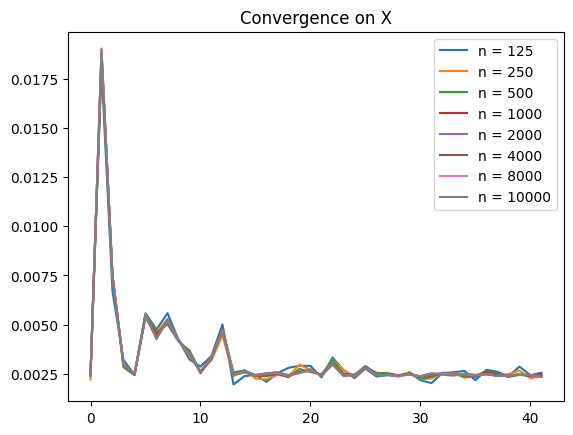

In [365]:
# Use random error simulation

# Generate power spectrum
ps, freq = fourier_calc(x_mic0, x_mic0.size)
psy, freqy = fourier_calc(y_mic0, y_mic0.size)

# Empty list for errors
many_errs = []
many_errsf = []
mean_errs = []
mean_errsf = []

# How many interations?
n = np.array([125,250,500,1000,2000,4000,8000,10000])

for j in range(n.size):

    # Loop to do random distribution many times
    for i in range(n[j]):

        # random distribution of number between plus/minus 1/2 particle radius
        rand_dist = (np.random.rand(x_mic0.size)*2*radius*1e6 - radius*1e6)*(1/2)

        # Generate power spectrum with random error
        ps_rand, freq_rand = fourier_calc(x_mic0 + rand_dist, x_mic0.size)

        # Find difference in power spectrum
        ps_err_rand = np.abs(ps - ps_rand)
        freq_err_rand = np.abs(freq - freq_rand)

        # Add to big list
        many_errs.append(ps_err_rand)
        many_errsf.append(freq_err_rand)

    # Take the mean of the iterations
    ps_err_lots = np.mean(np.array(many_errs), axis = 0)
    freq_err_lots = np.mean(np.array(many_errsf), axis = 0)

    # Add to a big list
    mean_errs.append(ps_err_lots)
    mean_errsf.append(freq_err_lots)

    # Plot to see convergence behaviour
    plt.plot(np.arange(np.size(mean_errs[j])), mean_errs[j], label = 'n = {}'.format(n[j]), ms = 5)

plt.legend()
plt.title('Convergence on X')

Text(0.5, 1.0, 'Convergence on Y')

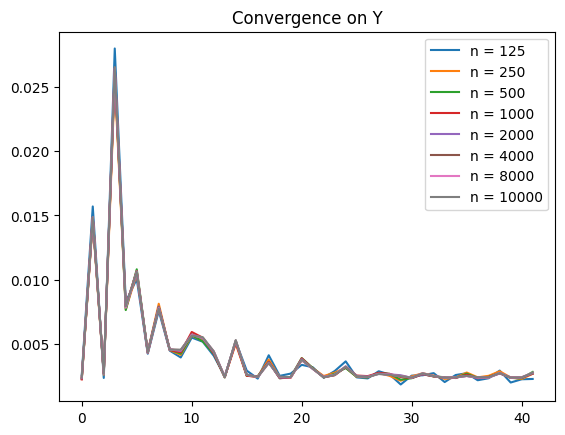

In [366]:
# Empty list for errors
many_errsy = []
mean_errsy = []

for j in range(n.size):

    # Loop to do random distribution many times
    for i in range(n[j]):

        # random distribution of number between plus/minus 1/2 particle radius
        rand_disty = (np.random.rand(y_mic0.size)*2*radius*1e6 - radius*1e6)*(1/2)

        # Generate power spectrum with random error
        ps_randy, freq_randy = fourier_calc(y_mic0 + rand_disty, y_mic0.size)

        # Find difference in power spectrum
        ps_err_randy = np.abs(psy - ps_randy)

        # Add to big list
        many_errsy.append(ps_err_randy)

    # Take the mean of the iterations
    ps_err_lotsy = np.mean(np.array(many_errsy), axis = 0)

    # Add to a big list
    mean_errsy.append(ps_err_lotsy)

    # Plot to see convergence behaviour
    plt.plot(np.arange(np.size(mean_errsy[j])), mean_errsy[j], label = 'n = {}'.format(n[j]), ms = 5)

plt.legend()
plt.title('Convergence on Y')

In [367]:
''' Take error on power spectrum to be the erros generated from 10,000 random iterations'''
ps_err = mean_errs[-1]
freq_err = mean_errsf[-1]

ps_erry = mean_errsy[-1]

Text(0, 0.5, 'Fourier Transform Squared / Arb Units')

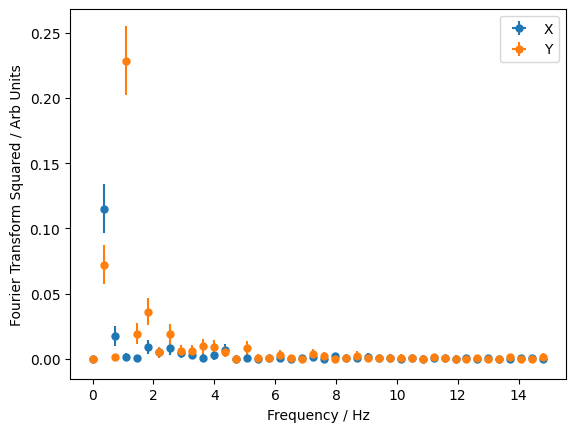

In [368]:
# Plot using above function
plt.errorbar(freq, ps, xerr = freq_err, yerr = ps_err, ms = 5, fmt = 'o', linestyle = '',label = 'X')
plt.errorbar(freqy, psy, xerr = freq_err, yerr = ps_erry, ms = 5, fmt = 'o', linestyle = '',label = 'Y')
plt.legend()
plt.xlabel('Frequency / Hz')
plt.ylabel('Fourier Transform Squared / Arb Units')

In [369]:
# try getting rid of first data point
# point = 0
# freq = np.delete(freq,point)
# freq_err = np.delete(freq_err,point)
# ps = np.delete(ps,point)
# ps_err = np.delete(ps_err,point)

print(freq_err.size, ps_err.size)

# Make errorbars the right shape to only see upper bars
ps_err_upper = np.zeros([2,ps_err.size])
ps_err_upper[1,:] = ps_err

ps_errs_trunc = np.zeros([2,ps_err.size])
ps_errs_trunc[1,:] = ps_err
ps_errs_trunc[0,:] = np.abs(ps - 0.5*1e-7) # so that graph looks neater
ps_errs_truncy = np.zeros([2,ps_erry.size])
ps_errs_truncy[1,:] = ps_erry
ps_errs_truncy[0,:] = np.abs(psy - 0.5*1e-7) # so that graph looks neater

42 42


C:\Users\abiga\AppData\Local\Temp\ipykernel_24540\2043525069.py:9: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(1e-8,0)


(1e-08, 8.203214463072182)

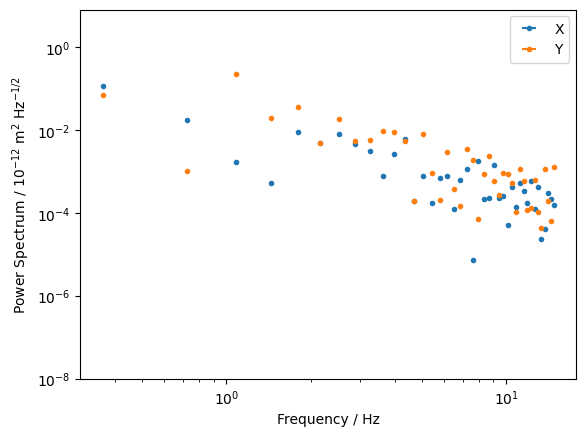

In [370]:
# Use a log scale
plt.errorbar(freq, ps, xerr = freq_err, label = 'X', linestyle = '', marker = 'o', ms = 3)
plt.errorbar(freqy, psy, xerr = freq_err, label = 'Y', linestyle = '', marker = 'o', ms = 3)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.xlabel('Frequency / Hz')
plt.ylabel('Power Spectrum / 10$^{-12}$ m$^2$ Hz$^{-1/2}$')
plt.ylim(1e-8,0)

In [371]:
# Fit the above to Lorenzian Power Spectrum

def Lorentzian(x,A,f_0):
    return A / (1 + (x/f_0)**2)

ig = np.array([0.12,0.1])

# Fits to different errors in fit
yfit, parameters, perrors, chisq_reduced, p_value, dof = fit_labs(freq,ps,ps_err,Lorentzian,ig)
yfity, parametersy, perrorsy, chisq_reducedy, p_valuey, dofy = fit_labs(freqy,psy,ps_erry,Lorentzian,ig)
#yfitb, parametersb, perrorsb, chisq_reducedb, p_valueb, dofb = fit_labs(freq,ps,ps_err,Lorentzian,ig)

In [372]:
print(psy)

[1.05912178e-30 7.21622410e-02 1.05102661e-03 2.28742185e-01
 1.93110304e-02 3.62110716e-02 5.05112521e-03 1.86339719e-02
 5.68263315e-03 5.89460378e-03 9.53528463e-03 9.07812461e-03
 5.54089380e-03 1.96747901e-04 8.23927973e-03 9.29184013e-04
 2.05223315e-04 3.00724813e-03 3.92200076e-04 1.49069631e-04
 3.62136954e-03 1.94578325e-03 7.27336230e-05 8.98807787e-04
 2.35924291e-03 5.93797686e-04 2.77322307e-04 9.60348145e-04
 8.95051894e-04 5.51148979e-04 1.08851964e-04 1.19968548e-03
 6.10173200e-04 1.20153785e-04 1.35337290e-04 6.34078078e-04
 1.09020448e-04 4.30645593e-05 1.18440694e-03 2.00684417e-04
 6.54682078e-05 1.28360374e-03]


C:\Users\abiga\AppData\Local\Temp\ipykernel_24540\587987754.py:73: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim([0,18])
C:\Users\abiga\AppData\Local\Temp\ipykernel_24540\587987754.py:74: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax2.set_xlim([0,18])
C:\Users\abiga\AppData\Local\Temp\ipykernel_24540\587987754.py:75: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax3.set_xlim([0,18])
C:\Users\abiga\AppData\Local\Temp\ipykernel_24540\587987754.py:76: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax4.set_xlim([0,18])


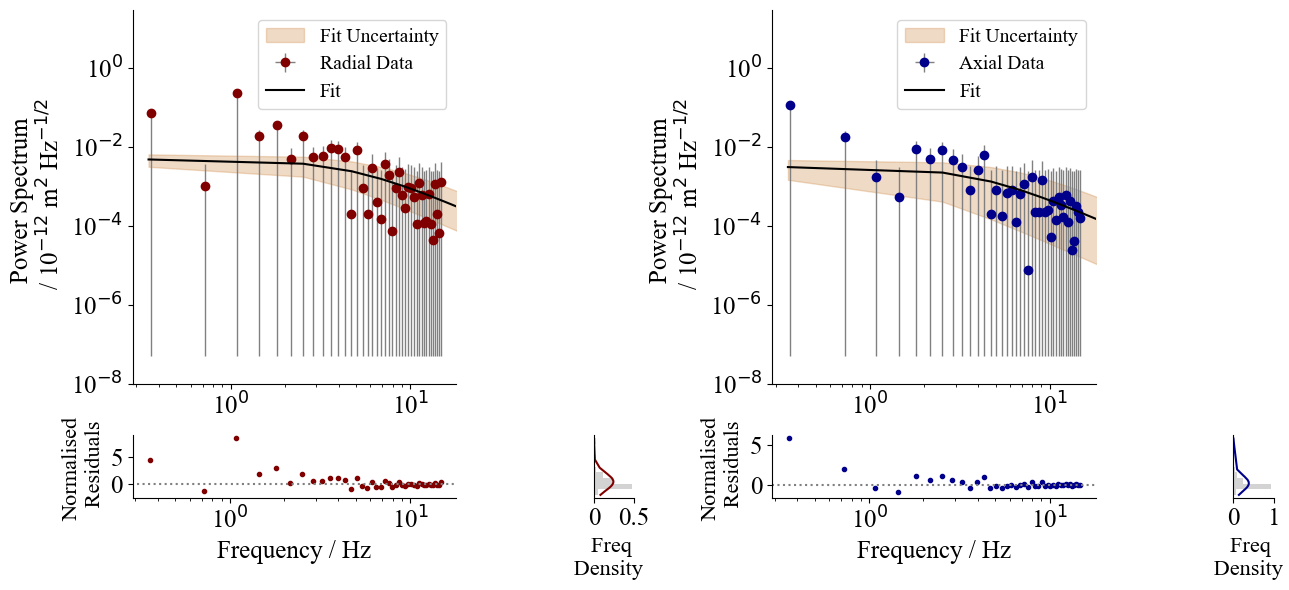

In [373]:
# Plot with Fit
# Use a log scale

fig, ((ax1,dead1,ax2,dead2), (ax3,axRad,ax4,axAx)) = plt.subplots(2,4, figsize = (13,6), height_ratios = (6,1), width_ratios = (8,1,8,1))

# Dead Axis 
dead1.axis('off')
dead2.axis('off')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
axRad.spines['top'].set_visible(False)
axRad.spines['right'].set_visible(False)
axAx.spines['top'].set_visible(False)
axAx.spines['right'].set_visible(False)

# Font for legends 
import matplotlib as mpl
font1 = mpl.font_manager.FontProperties(family='Times New Roman',
style='normal', size=14)

some_fs = np.linspace(0.35,20,10)

# Axis 2 - X - axial direction
ax2.errorbar(freq, ps, xerr = 0, yerr = ps_errs_trunc, label = 'Axial Data', linestyle = '', marker = 'o', color = 'darkblue', ecolor = 'grey', capsize = 0, elinewidth = 1)
ax2.errorbar(some_fs, Lorentzian(some_fs,parameters[0],parameters[1]), label = 'Fit', linestyle = '-', color = 'black')

ax2.fill_between(some_fs, Lorentzian(some_fs,parameters[0]+perrors[0],parameters[1]+perrors[1]), Lorentzian(some_fs,parameters[0]-perrors[0],parameters[1]-perrors[1]),
                 color = 'peru', alpha = 0.3, label = 'Fit Uncertainty')

ax2.set_yscale('log')
ax2.set_xscale('log')
ax2.set_ylabel('Power Spectrum \n / 10$^{-12}$ m$^2$ Hz$^{-1/2}$', fontsize = 18, font = 'Times New Roman')
ax4.set_xlabel('Frequency / Hz', fontsize = 18, font = 'Times New Roman')
#ax2.set_ylim(1e-8,1)

# Axis 1 - Y - Radial Direction
ax1.errorbar(freqy, psy, xerr = 0, yerr = ps_errs_truncy, label = 'Radial Data', linestyle = '', marker = 'o', color = 'maroon', ecolor = 'grey', capsize = 0, elinewidth = 1)
ax1.errorbar(some_fs, Lorentzian(some_fs,parametersy[0],parametersy[1]), label = 'Fit', linestyle = '-', color = 'black')

ax1.fill_between(some_fs, Lorentzian(some_fs,parametersy[0]+perrorsy[0],parametersy[1]+perrorsy[1]), Lorentzian(some_fs,parametersy[0]-perrorsy[0],parametersy[1]-perrorsy[1]),
                 color = 'peru', alpha = 0.3, label = 'Fit Uncertainty')

ax1.set_yscale('log')
ax1.set_xscale('log')
ax1.set_ylabel('Power Spectrum \n / 10$^{-12}$ m$^2$ Hz$^{-1/2}$', fontsize = 18, font = 'Times New Roman')
ax3.set_xlabel('Frequency / Hz', fontsize = 18, font = 'Times New Roman')
#ax1.set_ylim(1e-8,1)

# Residuals 

# Residuals

resx = norm_residuals(freq,ps,ps_err,Lorentzian,parameters)
resy = norm_residuals(freqy,psy,ps_erry,Lorentzian,parametersy)

ax3.errorbar(freq, resy, color = 'maroon', linestyle = '', marker = 'o', ms = 3)
ax4.errorbar(freq, resx,color = 'darkblue', linestyle = '', marker = 'o', ms = 3)
ax3.set_ylabel('Normalised \n Residuals', fontsize = 16, font = 'Times New Roman')
ax4.set_ylabel('Normalised \n Residuals', fontsize = 16, font = 'Times New Roman')

ax3.errorbar([0,30], [0,0], color = 'grey', linestyle = 'dotted')
ax4.errorbar([0,30], [0,0], color = 'grey', linestyle = 'dotted')

ax3.set_xscale('log')
ax4.set_xscale('log')

ax1.set_xlim([0,18])
ax2.set_xlim([0,18])
ax3.set_xlim([0,18])
ax4.set_xlim([0,18])

ax1.set_ylim([1e-8,3*10e0])
ax2.set_ylim([1e-8,3*10e0])


# Histogram
meanx, stderrx, sorted_resx, distx = histogram_plot(resx)
axAx.plot(distx, sorted_resx, color = 'darkblue')
axAx.hist(sorted_resx, density = True, orientation = 'horizontal', color = 'lightgrey')
axAx.set_yticks(ticks = [], labels = [])
axAx.set_xlabel('Freq \n Density   ', fontsize = 16, font = 'Times New Roman')

meany, stderry, sorted_resy, disty = histogram_plot(resy)
axRad.plot(disty, sorted_resy, color = 'maroon')
axRad.hist(sorted_resy, density = True, orientation = 'horizontal', color = 'lightgrey')
axRad.set_yticks(ticks = [], labels = [])
axRad.set_xlabel('Freq \n Density   ', font = 'Times New Roman', fontsize = 16)

# Bigger font on axes

# Function to generate Log ticks as I want
def tick_funct(x,pos):
    ''' x: tick value, pos: tick position'''
    power = np.log10(x)
    string = '10$^{%1.0f}$'%power
    return string

# Y axis ticks - first as normal, then call the Function Formatter
ax1.set_yticks(ticks = [1,0.01,0.0001,0.000001,0.00000001], labels = [1,0.01,0.0001,0.000001,0.00000001], fontsize = 14, font = 'Times New Roman')
ax2.set_yticks(ticks = [1,0.01,0.0001,0.000001,0.00000001], labels = [1,0.01,0.0001,0.000001,0.00000001], fontsize = 14, font = 'Times New Roman')
import matplotlib.ticker as ti
ax1.get_yaxis().set_major_formatter(ti.FuncFormatter(tick_funct))
ax2.get_yaxis().set_major_formatter(ti.FuncFormatter(tick_funct))

ax3.set_yticks(ticks = [0,5], labels = [0,5], fontsize = 16, font = 'Times New Roman')
ax4.set_yticks(ticks = [0,5], labels = [0,5], fontsize = 16, font = 'Times New Roman')
axRad.set_xticks(ticks = [0,0.5], labels = [0,0.5], fontsize = 14, font = 'Times New Roman')
axAx.set_xticks(ticks = [0,1], labels = [0,1], fontsize = 14, font = 'Times New Roman')

# X Axis ticks
ax1.set_xticks(ticks = [1,10], labels = [1,10], fontsize = 14, font = 'Times New Roman')
ax2.set_xticks(ticks = [1,10], labels = [1,10], fontsize = 14, font = 'Times New Roman')
ax3.set_xticks(ticks = [1,10], labels = [1,10], fontsize = 14, font = 'Times New Roman')
ax4.set_xticks(ticks = [1,10], labels = [1,10], fontsize = 14, font = 'Times New Roman')
ax1.get_xaxis().set_major_formatter(ti.FuncFormatter(tick_funct))
ax2.get_xaxis().set_major_formatter(ti.FuncFormatter(tick_funct))
ax3.get_xaxis().set_major_formatter(ti.FuncFormatter(tick_funct))
ax4.get_xaxis().set_major_formatter(ti.FuncFormatter(tick_funct))

ax1.tick_params(axis='x', labelsize=18)
ax1.tick_params(axis='y', labelsize=18)
ax2.tick_params(axis='x', labelsize=18)
ax2.tick_params(axis='y', labelsize=18)
ax3.tick_params(axis='x', labelsize=18)
ax3.tick_params(axis='y', labelsize=18)
ax4.tick_params(axis='x', labelsize=18)
ax4.tick_params(axis='y', labelsize=18)
axRad.tick_params(axis='x', labelsize=18)
axRad.tick_params(axis='y', labelsize=18)
axAx.tick_params(axis='x', labelsize=18)
axAx.tick_params(axis='y', labelsize=18)

# ax1.set_tick_params(labelsize = 30)

# Legends
ax1.legend(prop = font1, loc = 'upper right')
ax2.legend(prop = font1, loc = 'upper right')

fig.tight_layout()

In [374]:
# Print Results

print('FOR X - Axial Direction')
print('The Amplitude of the Lorentzian is {} pm {} 10^-12 m$^2$ Hz^-1/2$'.format(parameters[0], perrors[0]))
print('The Cutoff Frequency is {} pm {} Hz'.format(parameters[1], perrors[1]))
print('The reduced chi squared value for the fit is {}'.format(chisq_reduced))
print('  ')
print('FOR Y - Radial Direction')
print('The Amplitude of the Lorentzian is {} pm {} 10^-12 m$^2$ Hz^-1/2$'.format(parametersy[0], perrorsy[0]))
print('The Cutoff Frequency is {} pm {} Hz'.format(parametersy[1], perrorsy[1]))
print('The reduced chi squared value for the fit is {}'.format(chisq_reducedy))

FOR X - Axial Direction
The Amplitude of the Lorentzian is 0.0031284249490410513 pm 0.0015740278471559636 10^-12 m$^2$ Hz^-1/2$
The Cutoff Frequency is 4.066732781233564 pm 2.543364979764301 Hz
The reduced chi squared value for the fit is 1.1771409841762766
  
FOR Y - Radial Direction
The Amplitude of the Lorentzian is 0.0048707097156507305 pm 0.0016591376276302154 10^-12 m$^2$ Hz^-1/2$
The Cutoff Frequency is 4.71417079300704 pm 1.8996377062532566 Hz
The reduced chi squared value for the fit is 3.0607034389957493


In [375]:
# Calculate the key parameters

# ROUGHLY 1.5 centi Poise 
# https://corecheminc.com/ethylene-glycol-water-mixture-properties/
eta = 1.5e-3 # Pa s
eta_err = 0.1e-3

# Boltzmanns const
k_b = 1.38e-23
# Temperature
T = 273+20
T_err = 5

# Caclulate stokes drag constant
beta = 6*np.pi*eta*radius

# Beta errors 
eta_cont = np.abs(6*np.pi*(eta+eta_err)*radius - 6*np.pi*eta*radius)
rad_cont = np.abs(6*np.pi*eta*(radius+radius_err) - 6*np.pi*eta*radius)
beta_err = np.sqrt(eta_cont**2 + rad_cont**2)

print(' Beta is {} pm {} 10^-8 N s m^-1'.format(beta*1e8, beta_err*1e8))

# Use cutoff freq to find stiffness constant, kappa
f0 = parameters[1]
f0_err = perrors[1]
stiffness = 2*np.pi*beta*f0

f0y = parametersy[1]
f0_erry = perrorsy[1]
stiffnessy = 2*np.pi*beta*f0y

# Kappa Errors

beta_cont = np.abs(2*np.pi*(beta+beta_err)*f0 - 2*np.pi*beta*f0)
f0_cont = np.abs(2*np.pi*beta*(f0+f0_err) - 2*np.pi*beta*f0)
stiffness_err = np.sqrt(beta_cont**2 + f0_cont**2)

beta_conty = np.abs(2*np.pi*(beta+beta_err)*f0y - 2*np.pi*beta*f0y)
f0_conty = np.abs(2*np.pi*beta*(f0y+f0_erry) - 2*np.pi*beta*f0y)
stiffness_erry = np.sqrt(beta_cont**2 + f0_conty**2)

print('The Stiffness Constant for X is k = {} pm {} micro N m^-1'.format(stiffness*1e6, stiffness_err*1e6))
print('The Stiffness Constant for Y is k = {} pm {} micro N m^-1'.format(stiffnessy*1e6, stiffness_erry*1e6))

 Beta is 3.619114736935442 pm 0.2416881357282628 10^-8 N s m^-1
The Stiffness Constant for X is k = 0.9247574881317232 pm 0.5816380431337221 micro N m^-1
The Stiffness Constant for Y is k = 1.0719820985736774 pm 0.4363615602831482 micro N m^-1


In [376]:
# Trapping Force - kx

''' Use standard deviation as delta x?'''
delta_x = np.std(x_mic0) * 1e-6 # CONVERT TO METRES
force = stiffness*delta_x
force_err = stiffness_err*delta_x

delta_y = np.std(y_mic0) * 1e-6 # CONVERT TO METRES
forcey = stiffnessy*delta_y
force_erry = stiffness_erry*delta_y

print('The force for X is {} pm {} pN'.format(force*1e12,force_err*1e12))
print('The force for Y is {} pm {} pN'.format(forcey*1e12,force_erry*1e12))

The force for X is 0.46773850155419605 pm 0.29419010955176 pN
The force for Y is 0.8386896009555426 pm 0.3413974014614184 pN


In [377]:
# F = QnP / c
# so Q = Fc / nP

power = 1e-3 # in watts
power_err = 1e-3
n = 1.38805 # see https://pubs.acs.org/doi/10.1021/je900630n 
c = 3e8

Q = force*c / n*power
Qy = forcey*c / n*power

# Error on Q - not including n or c
power_cont = np.abs( (force*c / n*(power+power_err)) - (force*c / n*power) )
force_cont = np.abs( ((force+force_err)*c / n*power) - (force*c / n*power) )
Q_err = np.sqrt(force_cont**2 + power_cont**2)

power_conty = np.abs( (forcey*c / n*(power+power_err)) - (forcey*c / n*power) )
force_conty = np.abs( ((forcey+force_erry)*c / n*power) - (forcey*c / n*power) )
Q_erry = np.sqrt(force_conty**2 + power_conty**2)

print('The Trapping Efficiency Q in the X direction is {} pm {}'.format(Q,Q_err))
print('The Trapping Efficiency Q in the Y direction is {} pm {}'.format(Qy,Q_erry))
print('')
print('With error included, this is essentially zero')

The Trapping Efficiency Q in the X direction is 1.0109257625176241e-07 pm 1.1942598706325029e-07
The Trapping Efficiency Q in the Y direction is 1.8126643873539337e-07 pm 1.9570885385856328e-07

With error included, this is essentially zero
